In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns  
df = pd.read_csv('Archivos_higienizados/Higienizado_20240207.csv') 

Contacto general por toque

C:\Users\alexa\AppData\Local\Temp\ipykernel_22824\4130442830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Intento                  1       2       3       4
Calificacion                                      
CONTACTO EFECTIVO   14.70%   6.32%   4.22%   5.09%


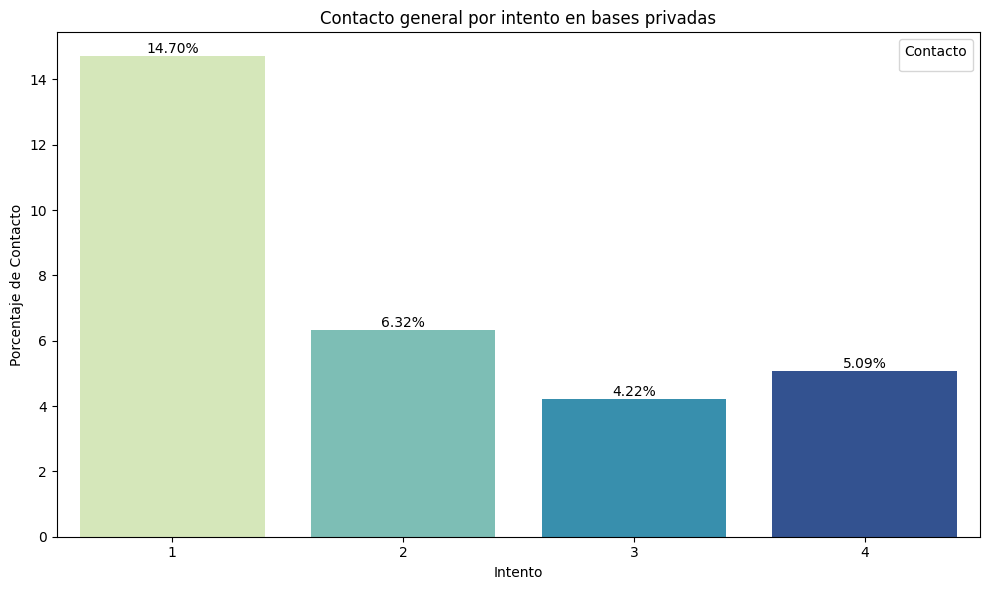

In [3]:
df_2 = df[df['Tipo_base']== 'Privado']
df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)
contactO_efectivo= df_2[df_2['Calificacion']== 'CONTACTO EFECTIVO']
pivot_table_intentos = pd.pivot_table(df_2[df_2['Intento']!= 0], values='Connid', index='Calificacion', columns='Intento', aggfunc='count', fill_value=0, dropna=False)
total_llamadas_intento = pivot_table_intentos.sum(axis=0)
pivot_table_porcentajes = pd.pivot_table(contactO_efectivo, values='Connid', index='Calificacion', columns='Intento', aggfunc='count', fill_value=0)
porcentaje_intentos = (pivot_table_porcentajes/total_llamadas_intento)*100
porcents_filtred = porcentaje_intentos[porcentaje_intentos.index.get_level_values('Calificacion') != 'NO CALIFICADO']
por_format = porcents_filtred.applymap(lambda x: f'{x: .2f}%')
print(por_format)


# Crear una gráfica de barras usando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=porcents_filtred, palette="YlGnBu")

# Agregar etiquetas de texto a las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurar detalles de la gráfica
plt.title('Contacto general por intento en bases privadas')
plt.xlabel('Intento')
plt.ylabel('Porcentaje de Contacto')
plt.xticks(rotation=0)
plt.legend(title='Contacto')

plt.tight_layout()
plt.show()

Calificación por tipo de tipificación

Intento             1        2        3        4
Tipificacion                                    
NO EFECTIVO    42.58%   38.71%   41.05%   52.29%
NO PAGO        45.01%   49.03%   48.42%   38.53%
PAGO           12.41%   12.26%   10.53%    9.17%


Text(145.72222222222223, 0.5, 'Tipificacion')

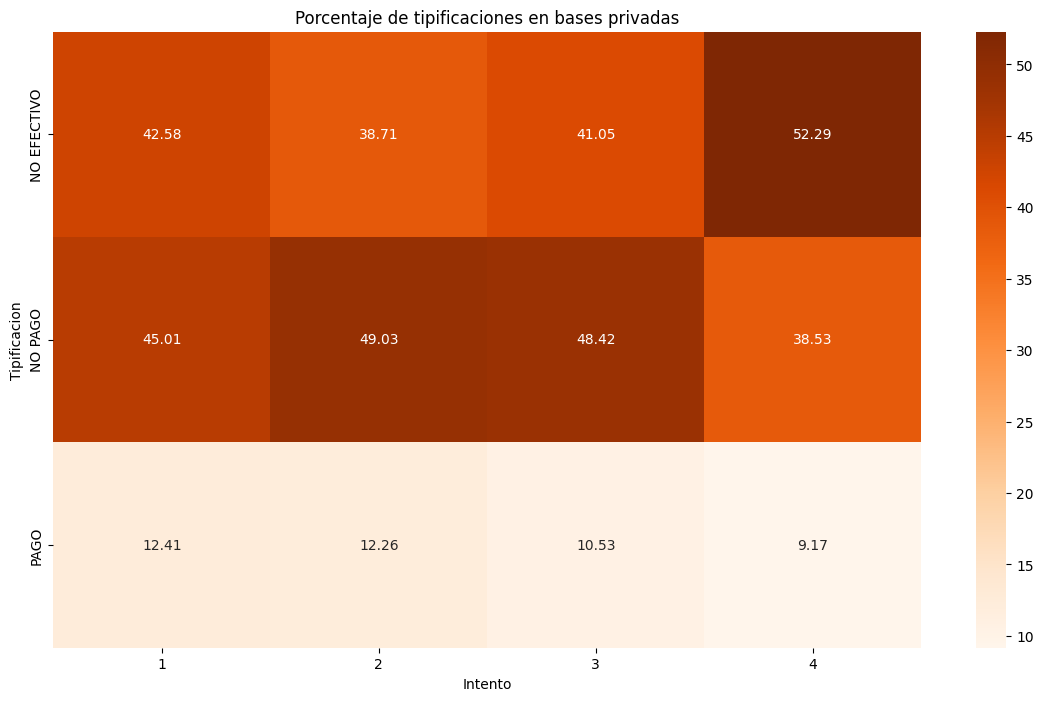

In [4]:
pivot_table_tipificaciones = pd.pivot_table(contactO_efectivo, values='Connid', index='Tipificacion', columns='Intento', aggfunc='count', fill_value=0 )
total_llamadas_intento_2 = pivot_table_tipificaciones.sum()
porcentaje_tipificaciones = (pivot_table_tipificaciones / total_llamadas_intento_2)*100
por_format_2 = porcentaje_tipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_2)
plt.figure(figsize=(14,8))
sns.heatmap(porcentaje_tipificaciones, annot=True, fmt=".2f", cmap="Oranges")
plt.title('Porcentaje de tipificaciones en bases privadas')
plt.xlabel('Intento')
plt.ylabel('Tipificacion')

Grupo no efectivo

Intento                                           1        2        3        4
SubTipificacion                                                               
ASEGURADO SOLICITA QUE LE LLAMEMOS DESPUÉS    0.57%    0.00%    0.00%    0.00%
CONTESTA Y CUELGA                            61.14%   31.67%   61.54%   61.40%
FALLECIDO                                     0.57%    0.00%    0.00%    0.00%
ILOCALIZABLE                                  8.57%   20.00%   10.26%   15.79%
NUMERO EQUIVOCADO                            29.14%   48.33%   28.21%   22.81%


Text(145.2222222222222, 0.5, 'Subtipificacion')

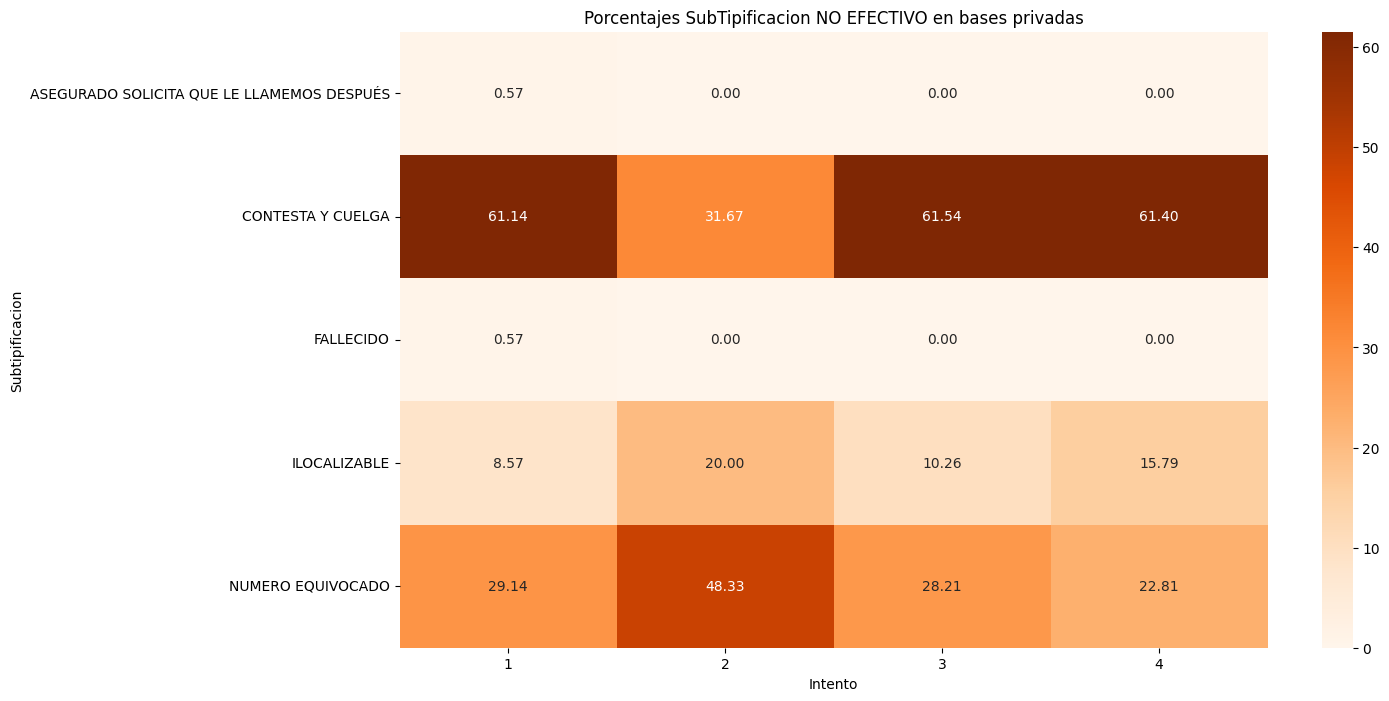

In [5]:
no_efectivo = df_2[df_2['Tipificacion']== 'NO EFECTIVO']
pivot_table_subtipificaciones = pd.pivot_table(no_efectivo, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_3 = pivot_table_subtipificaciones.sum()
porcen_subtipificaciones = (pivot_table_subtipificaciones/total_llamadas_intento_3)*100
por_format_3 = porcen_subtipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_3)
plt.figure(figsize=(14,8))
plt.title('Porcentajes SubTipificacion NO EFECTIVO en bases privadas')
sns.heatmap(porcen_subtipificaciones, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intento')
plt.ylabel('Subtipificacion')

Grupo no pago

Intento                                                   1        2        3  \
SubTipificacion                                                                 
ASEGURADO INDICA NO TENER DINERO                      2.70%    1.32%    0.00%   
ASEGURADO INDICA QUE SU PÓLIZA YA ESTÁ EN PROCE...    0.54%    2.63%    2.17%   
ASEGURADO NO DESEA SEGUIR CON LA PÓLIZA               2.70%    0.00%    2.17%   
ASEGURADO NO QUISO PROPORCIONAR CANDADOS DE SEG...    4.86%    2.63%    8.70%   
ASEGURADO NO RECONOCE ADEUDO                          1.62%    0.00%    2.17%   
ASEGURADO SOLICITA HABLAR PRIMERO CON SU AGENTE      10.27%   13.16%   15.22%   
ASEGURADO SOLICITA QUE LE LLAMEMOS DESPUÉS           50.27%   38.16%   34.78%   
LA PERSONA QUE CONTESTA NO DESEA QUE LE VUELVAN...    2.16%    3.95%    0.00%   
NO DESEA PAGAR                                        0.00%    2.63%    0.00%   
POLIZA YA PAGADA AL MOMENTO DE LA LLAMADA            18.38%   28.95%   30.43%   
PÓLIZA CANCELADA POR FALTA D

Text(194.7222222222222, 0.5, 'Subtipificacion')

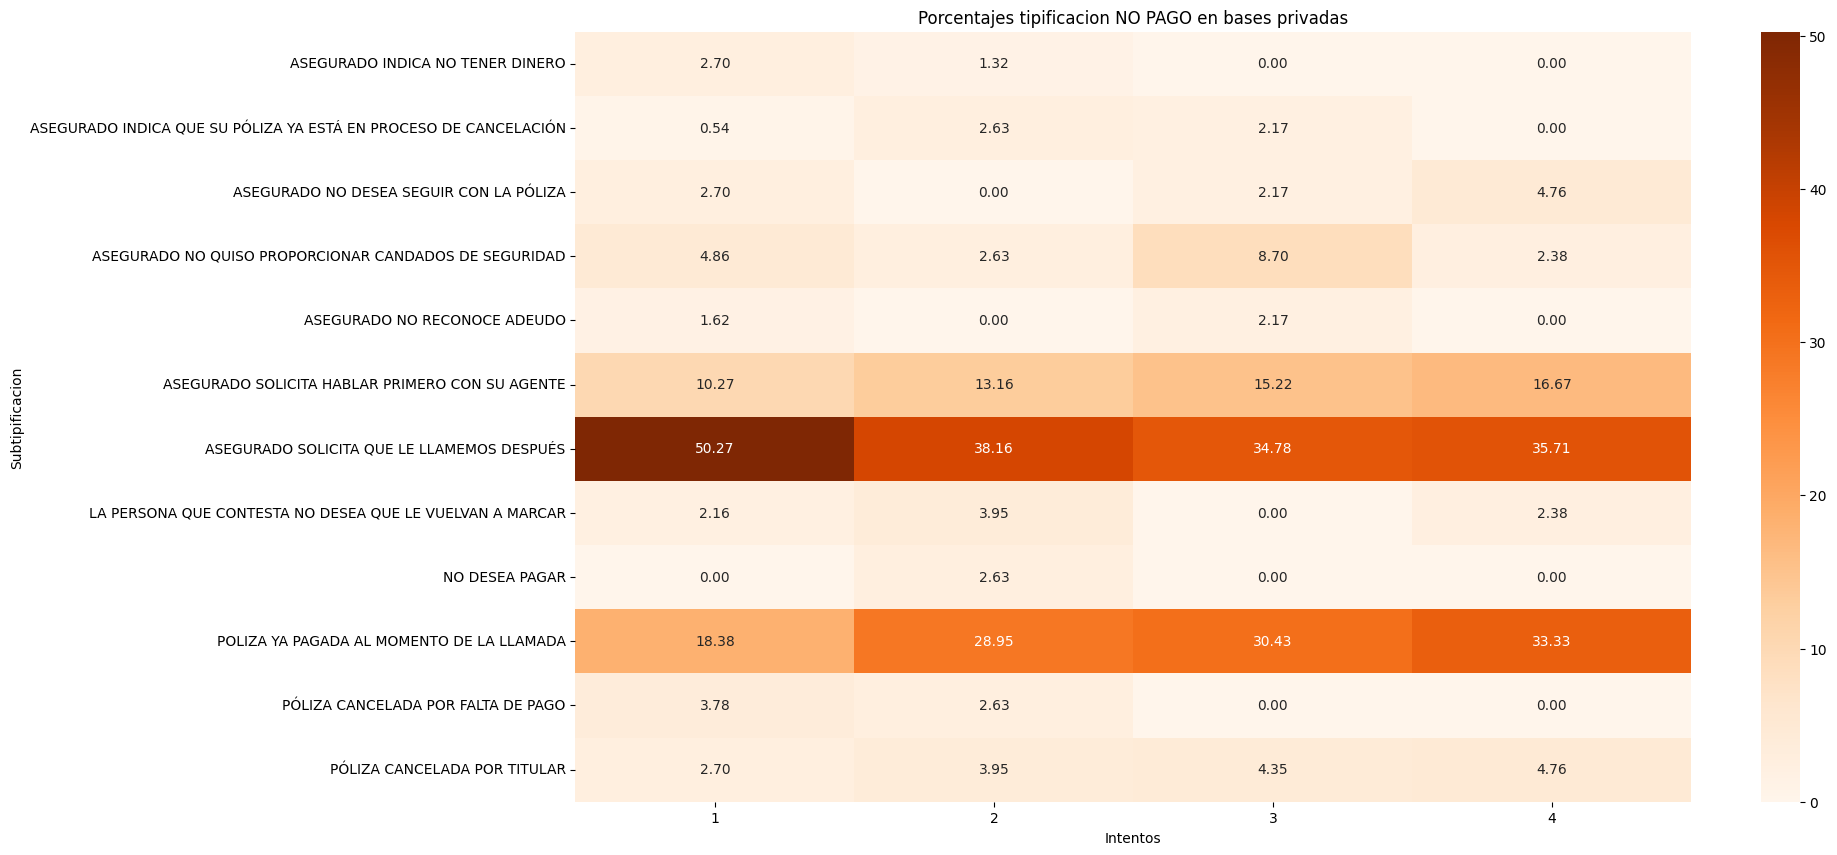

In [6]:
no_pago = df_2[df_2['Tipificacion']== 'NO PAGO']
pivot_table_subtipificaciones_1 = pd.pivot_table(no_pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_4 = pivot_table_subtipificaciones_1.sum()
porcen_subtipificaciones_1 = (pivot_table_subtipificaciones_1/total_llamadas_intento_4)*100
por_format_4 = porcen_subtipificaciones_1.applymap(lambda x: f'{x: .2f}%')
print(por_format_4)
plt.figure(figsize=(18,10))
plt.title('Porcentajes tipificacion NO PAGO en bases privadas')
sns.heatmap(porcen_subtipificaciones_1, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')

Grupo pago

Intento                                   1        2        3        4
SubTipificacion                                                       
COBRO EFECTIVO POR IVR                1.96%    5.26%   10.00%   10.00%
COBRO EFECTIVO POR PORTAL METLIFE     1.96%    0.00%   10.00%    0.00%
PROMESA DE PAGO EN BANCO             72.55%   94.74%   80.00%   60.00%
PROMESA DE PAGO POR PORTAL METLIFE   23.53%    0.00%    0.00%   30.00%


Text(145.7222222222222, 0.5, 'Subtipificacion')

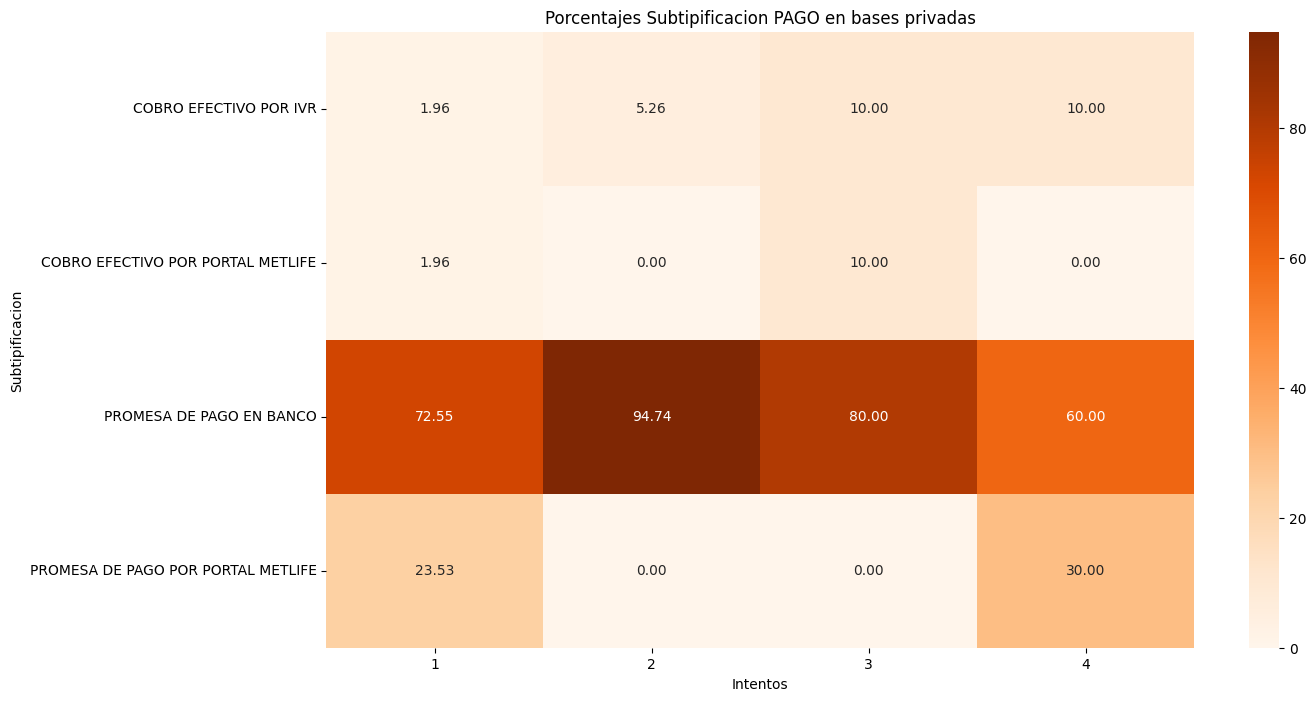

: 

In [7]:
pago = df_2[df_2['Tipificacion']== 'PAGO']
pivot_table_subtipificaciones_2 = pd.pivot_table(pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_5 = pivot_table_subtipificaciones_2.sum()
porcen_subtipificaciones_2 = (pivot_table_subtipificaciones_2/total_llamadas_intento_5)*100
por_format_5 = porcen_subtipificaciones_2.applymap(lambda x: f'{x: .2f}%')
print(por_format_5)
plt.figure(figsize=(14,8))
plt.title('Porcentajes Subtipificacion PAGO en bases privadas')
sns.heatmap(porcen_subtipificaciones_2, annot=True, fmt='.2f', cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')